# **Basics of cluster analysis**

**Import the relevant libraries**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

**Load the data**

In [76]:
data = pd.read_csv('sample_data/3.01.+Country+clusters.csv')

In [77]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


# **Plot the data**

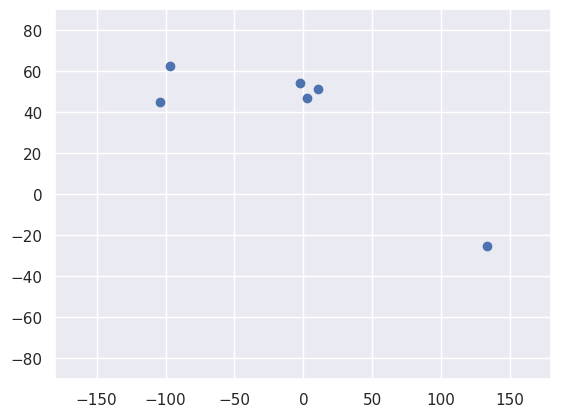

In [78]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180) # y轴 -180-180
plt.ylim(-90,90) # x轴 -90-90
plt.show()

# **Select the features**

In [79]:
x = data.iloc[:,1:3]
# DataFrame.iloc[行选择, 列选择]

In [80]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


# **Clustering**

In [94]:
kmeans = KMeans(n_clusters=3)

**n_clusters=2** 要形成的簇的数量以及要生成的质心的数量。

In [95]:
kmeans.fit(x)

KMeans(n_clusters=3)

**fit() 里面做了什么**

当你调用 kmeans.fit(X) 的时候，它会执行 K-Means 聚类的完整训练流程：

**初始化簇中心**

随机选择 k 个点作为初始中心，或者用 k-means++ 算法初始化。

**迭代步骤**
重复以下过程直到收敛：

**分配步骤**：计算每个样本到所有簇中心的距离，把样本分配到最近的簇。

**更新步骤**：重新计算每个簇的均值，作为新的簇中心。

**收敛条件**

簇中心不再明显移动，或者达到最大迭代次数 max_iter。

**fit() 可返回：**

kmeans.cluster_centers_   # 每个簇的中心点坐标

kmeans.labels_   # 每个样本被分到哪个簇（0,1,...,k-1）

kmeans.inertia_   # 越小越好，表示样本到簇中心的距离平方和

kmeans.n_iter_         # 实际迭代次数
kmeans.n_features_in_  # 特征数量

# **Clustering results**

In [96]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

**fit_predict()：** 在 fit() 的基础上，直接返回 labels_（每个点属于哪个簇）。

In [97]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


**copy()**

copy data

**data_with_clusters['Cluster'] = identified_clusters**

data_with_clusters['Cluster']：加入新的data feature，identified_clusters：column value

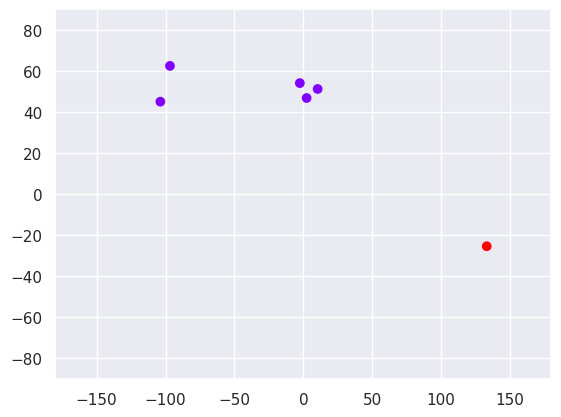

In [85]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

**plt.scatter(x, y, ...)**

散点图，每个点的横纵坐标分别是 x 和 y。

**c=...**

指定每个点的颜色。这里用的是 data_with_clusters['Cluster']，即聚类标签（0,1,2,…）。

所以同一个簇的点会有相同颜色。

**cmap='rainbow'**

定义颜色映射表（colormap），这里用了“彩虹色”。

也可以换成 'viridis'、'plasma'、'Set1' 等。

# **Map the data**

In [98]:
data_mapped = data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


# **Select the features**

In [127]:
x = data_mapped.iloc[:,1:4]

In [128]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


# **Clustering**

In [129]:
kmeans = KMeans(3)

In [130]:
kmeans.fit(x)

KMeans(n_clusters=3)

# **Clustering results**

In [131]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 0, 0, 2], dtype=int32)

In [132]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,2


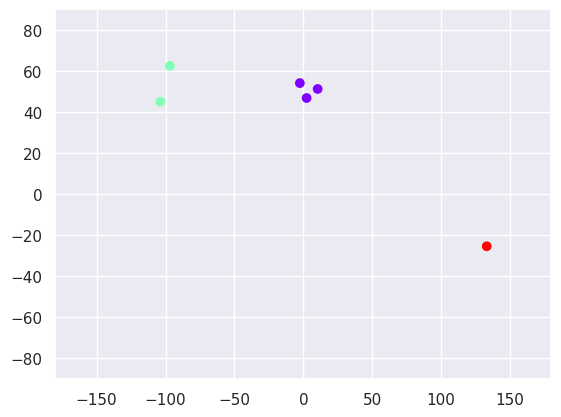

In [133]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# **WCSS**

In [134]:
kmeans.inertia_
# 通过上面的代码：kmeans = KMeans(3)，定义的kmeans

290.10523333333333

In [135]:
wcss=[]

for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wss_iter = kmeans.inertia_
  wcss.append(wss_iter)
# for loop里面rang(1,7)，让n_clusters等于不同数字，从1到7分别执行一次（KMeans(i)）

In [136]:
wcss
# 得出output，1-7的7个不同n_clusters的wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 42.17999999999999,
 0.0]

**WCSS = Within-Cluster Sum of Squares**
中文叫 簇内平方和，它衡量 簇内数据点到簇中心的紧密程度。

**kmeans.inertia_ 是紧密程度**，紧密程度有分紧密簇，松散簇。通常紧密程度越紧越好

**举例：**

如果一个簇里的点都挤在中心点附近，那说明这个簇很“紧密”，聚类效果好。

如果点分散得很远，说明这个簇很“松散”，聚类效果差。

**inertia 越小，说明所有点都更靠近自己的簇中心，簇更“紧密”。**

# **The Elbow Method**

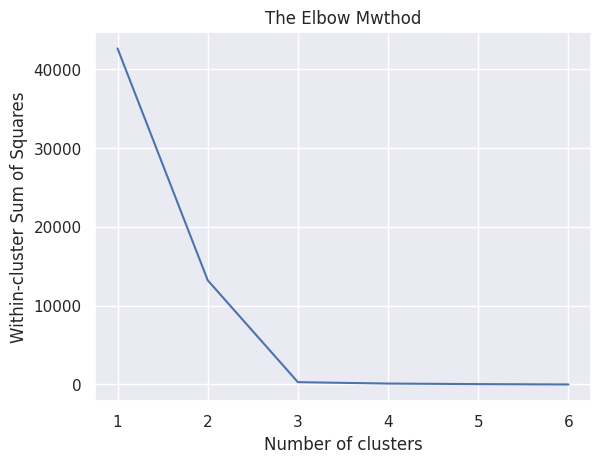

In [137]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Mwthod')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

**inertia 越小，说明所有点都更靠近自己的簇中心，簇更“紧密”。**

**结合你的图分析**

从 1 到 2：下降非常大（说明 1 簇 → 2 簇是个巨大提升）。

从 2 到 3：下降也明显。

从 3 往后：几乎贴近 0，提升非常有限。

👉 所以最合理的选择是 2 或 3 个簇。
通常在实际业务里会选 2 簇，因为它正好是“肘部”的位置；但如果你知道数据本来有 3 类，那选 3 也有道理。